# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [1]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")
import warnings
warnings.filterwarnings("ignore")

***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
http://www.learner.org/courses/againstallodds/about/glossary.html

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i^2 = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - N \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i = 0 \\
& N \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{N} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{N} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{N} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i (y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N x_i (y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N (x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x}\sum_{i=1}^N x_i - \hat{\beta}_1 \sum_{i=1}^N x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [2]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [4]:
boston.data.shape

(506, 13)

In [5]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
# Print description of Boston housing data set
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Now let's explore the data set itself. 

In [7]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [8]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [9]:
print(boston.target.shape)

(506,)


In [10]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [11]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

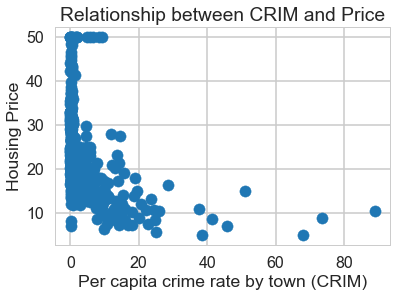

In [12]:
plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>


 #   Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

First I get the correlation among columns to get better undrestanding of the data.

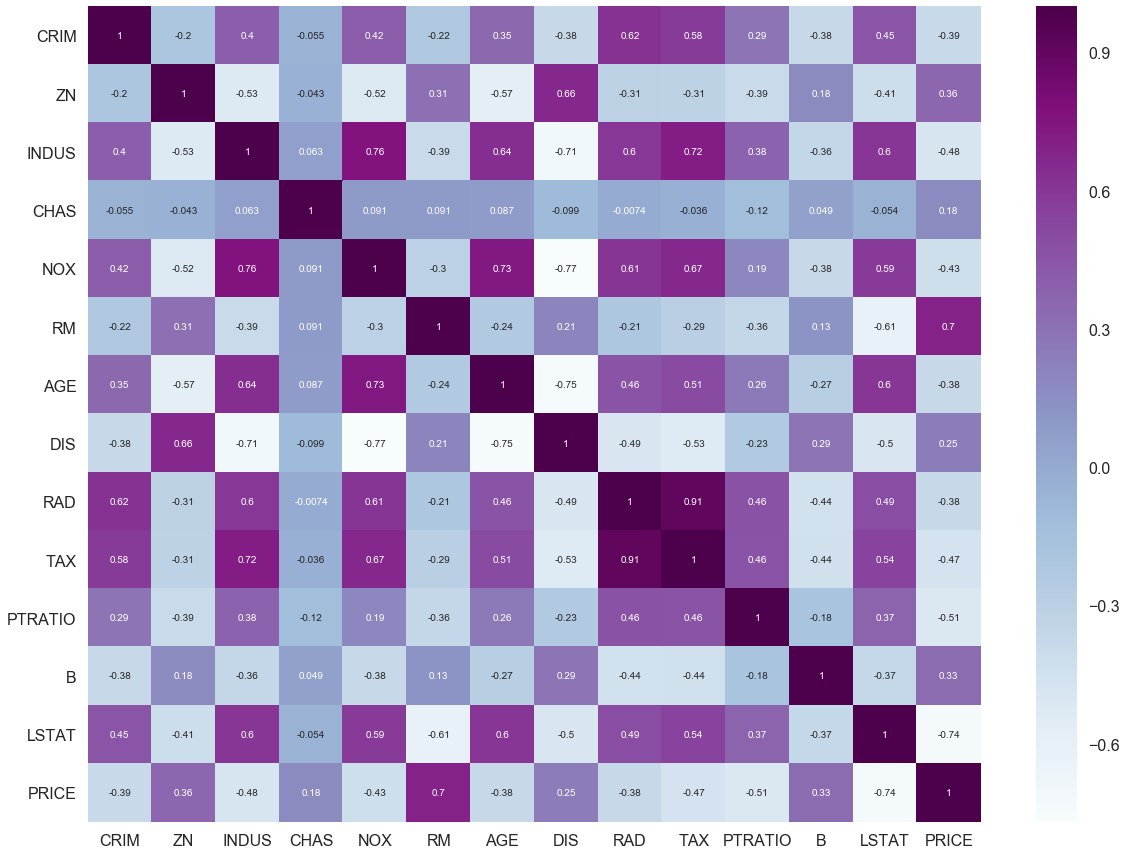

In [13]:
plt.figure(figsize=(20,15))
sns.heatmap(bos.corr(),cmap='BuPu',annot=True)
plt.show() #correlation map

In [14]:
(bos.corr()>0.7)|(bos.corr()<-.7)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,True,False,False,False,False,False,False,False,False,False,False,False,False,False
ZN,False,True,False,False,False,False,False,False,False,False,False,False,False,False
INDUS,False,False,True,False,True,False,False,True,False,True,False,False,False,False
CHAS,False,False,False,True,False,False,False,False,False,False,False,False,False,False
NOX,False,False,True,False,True,False,True,True,False,False,False,False,False,False
RM,False,False,False,False,False,True,False,False,False,False,False,False,False,False
AGE,False,False,False,False,True,False,True,True,False,False,False,False,False,False
DIS,False,False,True,False,True,False,True,True,False,False,False,False,False,False
RAD,False,False,False,False,False,False,False,False,True,True,False,False,False,False
TAX,False,False,True,False,False,False,False,False,True,True,False,False,False,False


I check two scatter plots of some interesting columns with absolute correlation higher than 0.7.
- AGE-DIS
- LSTAT-PRICE

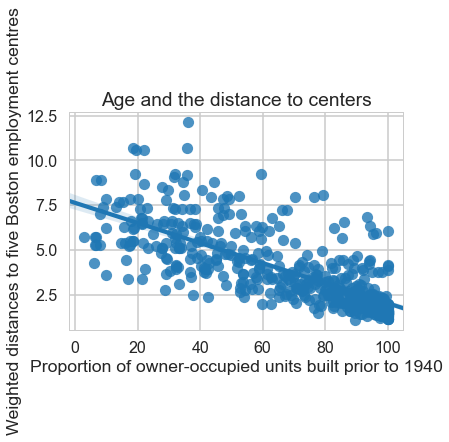

In [15]:
sns.regplot(x="AGE", y="DIS", data=bos, fit_reg = True)
plt.xlabel("Proportion of owner-occupied units built prior to 1940")
plt.ylabel("Weighted distances to five Boston employment centres")
plt.title("Age and the distance to centers")
plt.show()

The correlation between AGE and DIS is -0.75 and as it is shown in the figures, we can conclude the new houses are closer to the five Boston employee centers.

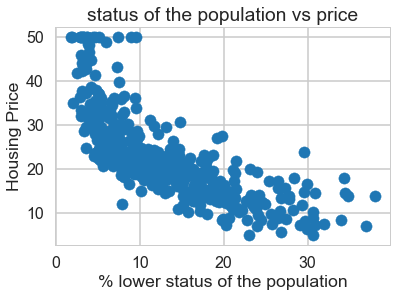

In [16]:
plt.scatter(bos.LSTAT, bos.PRICE)
plt.xlabel("% lower status of the population")
plt.ylabel("Housing Price")
plt.title("status of the population vs price")
plt.show()


There is a logarithmic trend between the price and the status of the population. So as the status of the population increase the housing price decrease. (corr=-0.74)

 **Scatter plot between *RM* and *PRICE* **

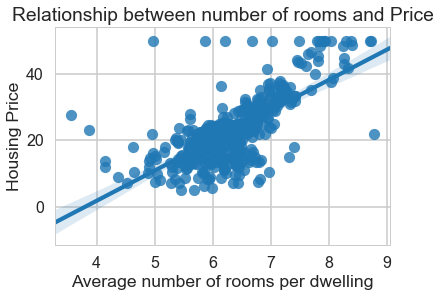

In [17]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)
plt.xlabel("Average number of rooms per dwelling")
plt.ylabel("Housing Price")
plt.title("Relationship between number of rooms and Price")
plt.show()

Correlation of the price and the number of rooms is around 0.69. And as it is shown in the figures there is a strong positive linear correlation between pricing and number of rooms. There are some outliers which could be because of other factors like location, age, accessibility,... of the housing.

** Scatter plot between *PTRATIO* and *PRICE* **

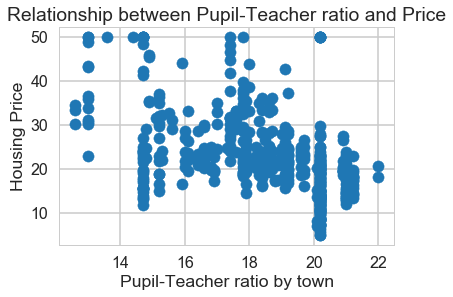

In [18]:
plt.scatter(bos.PTRATIO, bos.PRICE)
plt.xlabel("Pupil-Teacher ratio by town")
plt.ylabel("Housing Price")
plt.title("Relationship between Pupil-Teacher ratio and Price")
plt.show()

There is a small negetive correlations (-0.51) between pupil/teacher ratio and pricing. Since there is no strong relation and It is not easy to conclude how the trend change. But this could be interpreted as: "as housing price goes up, the size of classes (as measured by pupil-teacher ratio) goes down. Or, in other words, wealthy students get more attention from their teachers."

### Histograms
***


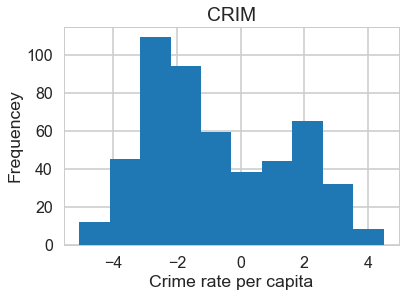

In [19]:
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

<p><b>Exercise:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>
</div>

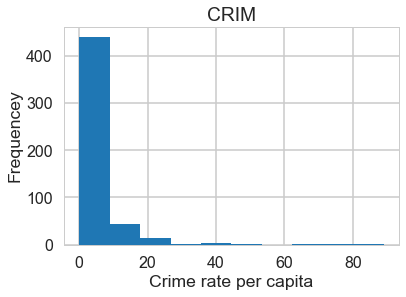

In [20]:
plt.hist(bos.CRIM)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()


The data is clumped in to one bin without log transformation and it is difficult to get a right picture of the distribution.
We can now notice that a majority of towns have crime rates between 0 and 1.

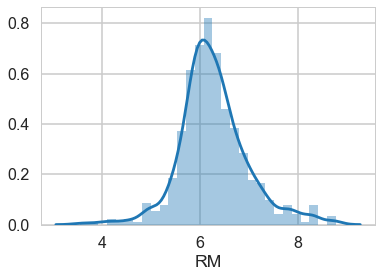

count    506.000000
mean       6.284634
std        0.702617
min        3.561000
25%        5.885500
50%        6.208500
75%        6.623500
max        8.780000
Name: RM, dtype: float64


In [21]:
sns.distplot(bos['RM'])
plt.show()
print(bos.RM.describe())

The number of rooms seems to be normally distributed in the dataset with the average number of rooms being close to 6.

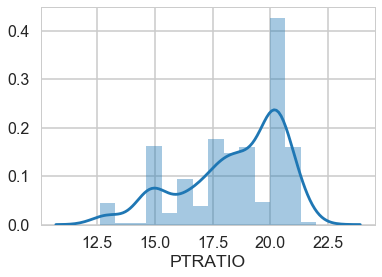

count    506.000000
mean      18.455534
std        2.164946
min       12.600000
25%       17.400000
50%       19.050000
75%       20.200000
max       22.000000
Name: PTRATIO, dtype: float64


In [22]:
sns.distplot(bos['PTRATIO'])
plt.show()
print(bos.PTRATIO.describe())

It is shown that the most common pupil teacher ratio is about 20. The frequency somehow increases as the ratio increases upto PTRATIO=20 but after that it starts decreasing.

## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [23]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [24]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sun, 02 Dec 2018   Prob (F-statistic):           2.49e-74
Time:                        16:32:14   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

<Figure size 1440x1080 with 0 Axes>

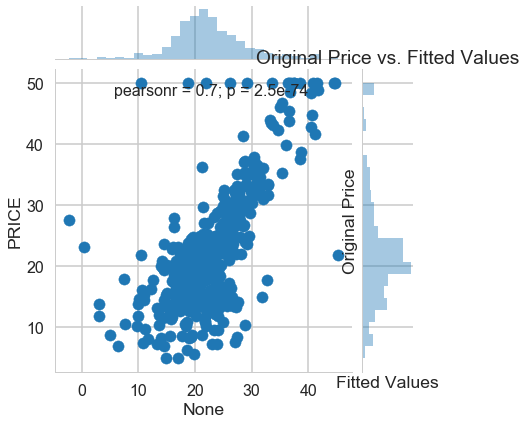

In [25]:
plt.figure(figsize=(20,15))
sns.jointplot( m.fittedvalues,bos['PRICE'])
plt.title('Original Price vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Original Price')
plt.show()

- There is a positive correlation of 0.7 between the fitted values and price.

- Now I use three features (RM, CRIM, PTRATIO) to predict the price and see if the prediction improve.



                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     244.2
Date:                Sun, 02 Dec 2018   Prob (F-statistic):           1.09e-97
Time:                        16:32:15   Log-Likelihood:                -1612.6
No. Observations:                 506   AIC:                             3233.
Df Residuals:                     502   BIC:                             3250.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3066      4.038     -0.819      0.4

<Figure size 1440x1080 with 0 Axes>

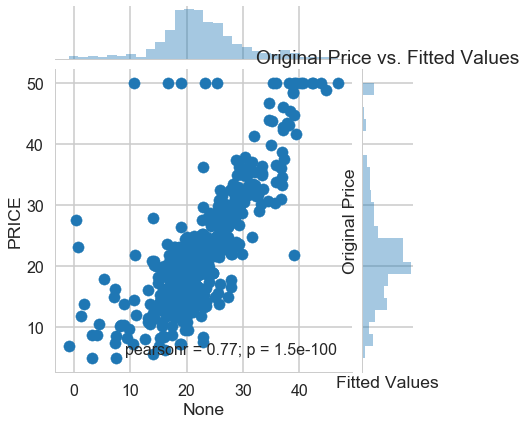

In [26]:
m1 = ols('PRICE ~ RM+CRIM+PTRATIO',bos).fit()
print(m1.summary())
plt.figure(figsize=(20,15))
sns.jointplot( m1.fittedvalues,bos['PRICE'])
plt.title('Original Price vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Original Price')
plt.show()

The correlation is higher with three features and the p value is much smaller. So we have a better prediction of the price with these three features.

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 02 Dec 2018   Prob (F-statistic):          6.95e-135
Time:                        16:32:16   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4911      5.104      7.149      0.0

<Figure size 1440x1080 with 0 Axes>

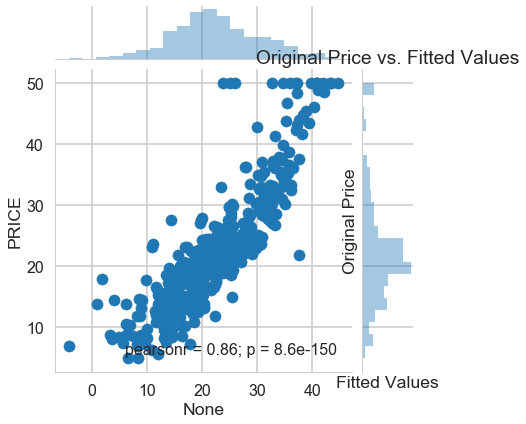

In [27]:
m2 = ols('PRICE ~ CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT',bos).fit()
print(m2.summary())
plt.figure(figsize=(20,15))
sns.jointplot( m2.fittedvalues,bos['PRICE'])
plt.title('Original Price vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Original Price')
plt.show()

The correlation is higher when we use all features and the p value is very very smaller. So we have a better prediction of the price with all features in.

### Fitting Linear Regression using `sklearn`


In [28]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [29]:
# Look inside lm object
# lm.<tab>

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [30]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/).</p>

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>


**  How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look here. **

If we define fit_intercept=False in LinearRegression object, the model will not fit an intercept. However, I dont recommend to do that. For example if all the feature values are set to zero the target value will be zero which may not be a correct value. Or in another word, we need the intercept because there's a baseline ("ground truth") house value that all other prices build off of.

**One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.**

The residuals should meet the following assumptions: 
- They are independent
- They have constant variance
- They are normally distributed

If they are independent and identically distributed (IID), then they must meet the first two criteria (since differing variances constitute non-identical distributions). However, IID data need not be normally distributed. For instance, imagine a set of data where each datum is independently drawn from the same uniform distribution. Then they would be independent, and they would have the same distribution, but that distribution would not be normal. 
So, It is not enough to have normally distributed residuals.


** True or false. To use linear regression, Y
must be normally distributed. Explain your answer.**

It is False, The normality assumption for linear regression applies to the errors, not the outcome variable. The usual statement is that the errors are i.i.d. (i.e., independently and identically distributed) as Normal with a mean of 0 and some variance.  Independence and homoscedasticity are more important assumptions than normality.

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [31]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 36.49110328036135


In [32]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [33]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [34]:
# first five predicted prices
lm.predict(X)[0:5]

array([30.00821269, 25.0298606 , 30.5702317 , 28.60814055, 27.94288232])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

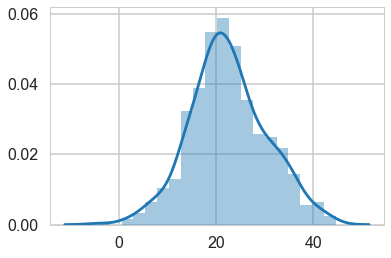

DescribeResult(nobs=506, minmax=(-4.283009341921691, 44.673399227722285), mean=22.53280632411068, variance=62.645582437365846, skewness=0.1107734825597236, kurtosis=0.10314181078841278)


In [35]:
from scipy import stats
Yhat=lm.predict(X)
sns.distplot(Yhat)
plt.show()
print(stats.describe(Yhat))

The predicted prices seem to fit well into the Normal Distribution bell curve. The mean value is 22.53 and the variance is 62.65 and slight skewness (0.1) to the right.

<Figure size 720x720 with 0 Axes>

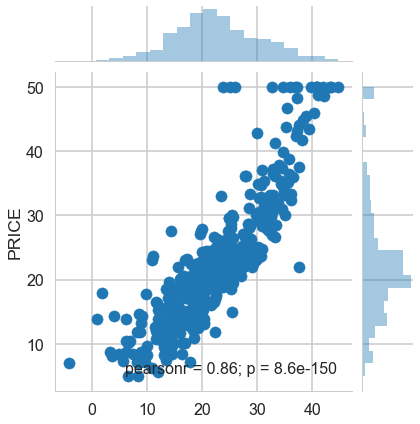

In [36]:
plt.figure(figsize=(10,10))
sns.jointplot(x=Yhat, y=bos['PRICE'])
plt.show()

There is an extremely strong correlation (0.86) between the predicted values and the actual price. This indicates that our model is doing a sufficiently good job of predicting prices. There are a few outliers at the end of the price spectrum, but no special adjustments necessary.

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [37]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

11080.276284149873


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [38]:
print(np.sum(lm.predict(X) - np.mean(bos.PRICE)) ** 2)

9.11966625339713e-23


### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSE = \frac{ESS}{K}$$
$$MSR = \frac{RSS}{N-K-1}$$

**Remember: ** Notation may vary across resources particularly the use of *R* and *E* in *RSS/ESS* and *MSR/MSE*. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

In [39]:
lm = LinearRegression()
lm.fit(X[['PTRATIO']], bos.PRICE)
print('Estimated intercept coefficient:', lm.intercept_)
print('Coefficient:', lm.coef_)


from sklearn.metrics import r2_score
r2=r2_score(bos.PRICE ,lm.predict(X[['PTRATIO']]))#, multioutput='variance_weighted')
print('R2 score of the linear regression is: ',r2)

Estimated intercept coefficient: 62.34462747483265
Coefficient: [-2.1571753]
R2 score of the linear regression is:  0.257847318009223


R2 presents the percentage of the variance in the response variable Y that can be explained by the linear regression.
 Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

In [40]:
import statsmodels.api as sm
X2 = sm.add_constant(X[['PTRATIO']])
est = sm.OLS(bos.PRICE, X2)
print(est.fit().f_pvalue)


1.609509478473047e-34


Variation Between Sample Means / Variation Within the Samples. The F-statistic is the test statistic for F-tests. In general, an F-statistic is a ratio of two quantities that are expected to be roughly equal under the null hypothesis, which produces an F-statistic of approximately 1.
The F Value or F ratio is the test statistic used to decide whether the model as a whole has statistically significant predictive capability, that is, whether the regression SS is big enough, considering the number of variables needed to achieve it. F is the ratio of the Model Mean Square to the Error Mean Square

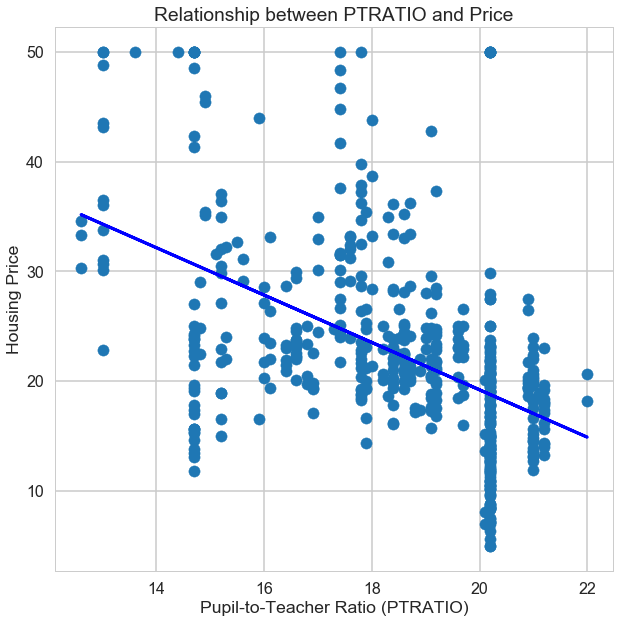

In [41]:
plt.figure(figsize=(10,10))
plt.scatter(bos.PTRATIO, bos.PRICE)
plt.xlabel("Pupil-to-Teacher Ratio (PTRATIO)")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")

plt.plot(bos.PTRATIO, lm.predict(X[['PTRATIO']]), color='blue', linewidth=3)
plt.show()

In [42]:
msePTRATIO = np.mean((bos.PRICE - lm.predict(X[['PTRATIO']])) ** 2)
msePTRATIO

62.65220001376927

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

In [43]:
lm.fit(X[['CRIM']], bos.PRICE)
mse = np.mean((bos.PRICE - lm.predict(X[['CRIM']])) ** 2)
print("Mean Square Error (CRIM): ", mse)

lm.fit(X[['RM']], bos.PRICE)
mse = np.mean((bos.PRICE - lm.predict(X[['RM']])) ** 2)
print("Mean Square Error (RM): ", mse)

lm.fit(X[['PTRATIO']], bos.PRICE)
mse = np.mean((bos.PRICE - lm.predict(X[['PTRATIO']])) ** 2)
print("Mean Square Error (PTRATIO): ", mse)
print('')

lm.fit(X[['CRIM','RM','PTRATIO']], bos.PRICE)
mse = np.mean((bos.PRICE - lm.predict(X[['CRIM','RM','PTRATIO']])) ** 2)
print("Mean Square Error (ALL THREE): ", mse)
print('Estimated intercept coefficient:', lm.intercept_)
print('Coefficient:', lm.coef_)


Mean Square Error (CRIM):  71.85234666526343
Mean Square Error (RM):  43.60055177116958
Mean Square Error (PTRATIO):  62.65220001376927

Mean Square Error (ALL THREE):  34.32379656468118
Estimated intercept coefficient: -3.3066171324064797
Coefficient: [-0.20210971  7.3815667  -1.0741868 ]


MSE is the least when all the three independent variables are used in conjuntion. This implies they are all important features in determining house prices.

In [44]:
lm.fit(X[['CRIM']], bos.PRICE)
r2=r2_score(bos.PRICE ,lm.predict(X[['CRIM']]))
print('R2 score (CRIM): ',r2)

lm.fit(X[['RM']], bos.PRICE)
r2=r2_score(bos.PRICE ,lm.predict(X[['RM']]))
print('R2 score (RM): ',r2)

lm.fit(X[['PTRATIO']], bos.PRICE)
r2=r2_score(bos.PRICE ,lm.predict(X[['PTRATIO']]))
print('R2 score (PTRATIO): ',r2)
print('')

lm.fit(X[['CRIM','RM','PTRATIO']], bos.PRICE)
r2=r2_score(bos.PRICE ,lm.predict(X[['CRIM','RM','PTRATIO']]))
print('R2 score (All three): ',r2)
print('Estimated intercept coefficient:', lm.intercept_)
print('Coefficient:', lm.coef_)


R2 score (CRIM):  0.14886609291873587
R2 score (RM):  0.48352545599133423
R2 score (PTRATIO):  0.257847318009223

R2 score (All three):  0.5934141551136979
Estimated intercept coefficient: -3.3066171324064797
Coefficient: [-0.20210971  7.3815667  -1.0741868 ]


- An R2 of 1.0 is the best. It means you have no error in your regression. An R2 of 0 means your regression is no better than taking the mean value, i.e. you are not using any information from the other variables. A Negative R2 means you are doing worse than the mean value.
- RM has higher score compare to CRIM and PTRATIO as it is expected. However when we use all thress features the rscore is the highest. 

In [45]:
x1 = sm.add_constant(X[['CRIM']])
est = sm.OLS(bos.PRICE, x1)
print('F-Value (CRIM):',est.fit().f_pvalue)

x1 = sm.add_constant(X[['RM']])
est = sm.OLS(bos.PRICE, x1)
print('F-Value(RM):',est.fit().f_pvalue)

x1 = sm.add_constant(X[['PTRATIO']])
est = sm.OLS(bos.PRICE, x1)
print('F_Value (PTRATIO):', est.fit().f_pvalue)
print('')

x1 = sm.add_constant(X[['PTRATIO','RM','PTRATIO']])
est = sm.OLS(bos.PRICE, x1)
print('F_Value (CRIM,RM,PTRATIO):',est.fit().f_pvalue)

F-Value (CRIM): 2.0835501108141935e-19
F-Value(RM): 2.4872288710080124e-74
F_Value (PTRATIO): 1.609509478473047e-34

F_Value (CRIM,RM,PTRATIO): 1.0393125618532472e-90


F-value is the least when all the three independent variables are used in conjuntion. This implies they are all important features in determining house prices.

## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

In [46]:
x1 = sm.add_constant(X[['PTRATIO','RM','PTRATIO']])
est1 = sm.OLS(bos.PRICE, x1)
print('F_Value (CRIM,RM,PTRATIO):',est1.fit().f_pvalue)

lm.fit(X[['CRIM','RM','PTRATIO']], bos.PRICE)
r2=r2_score(bos.PRICE ,lm.predict(X[['CRIM','RM','PTRATIO']]))
print('R2 score (All THREE): ',r2)
print('Akaike Information Criterion (AIC):',est1.fit().aic)
print('')



x2 = sm.add_constant(X[['PTRATIO','RM','PTRATIO','AGE','TAX']])
est2 = sm.OLS(bos.PRICE, x2)
print('F_Value (CRIM,RM,PTRATIO,AGE,TAX):',est2.fit().f_pvalue)
lm.fit(X[['CRIM','RM','PTRATIO','AGE','TAX']], bos.PRICE)
r2=r2_score(bos.PRICE ,lm.predict(X[['CRIM','RM','PTRATIO','AGE','TAX']]))
print('R2 score (All FIVE): ',r2)
print('Akaike Information Criterion (AIC):',est2.fit().aic)



F_Value (CRIM,RM,PTRATIO): 1.0393125618532472e-90
R2 score (All THREE):  0.5934141551136979
Akaike Information Criterion (AIC): 3269.620433554832

F_Value (CRIM,RM,PTRATIO,AGE,TAX): 3.986702612820177e-99
R2 score (All FIVE):  0.6119829228609928
Akaike Information Criterion (AIC): 3222.662121295756


I add two new features 'AGE' and 'TAX'. As it is shown above, the f-value is smaller for 5 features, the r2 score is higher and the AIC is smaller. Which means we have a better regression model with 5 features.


## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

In [47]:
model_fit= ols('PRICE ~X',bos).fit()

# fitted values (need a constant term for intercept)
model_fitted_y = model_fit.fittedvalues
# model residuals
model_residuals = model_fit.resid
# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = model_fit.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = model_fit.get_influence().cooks_distance[0]

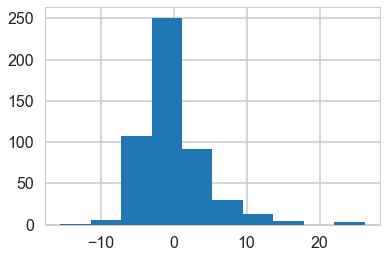

In [48]:
plt.hist(model_residuals)
plt.show()

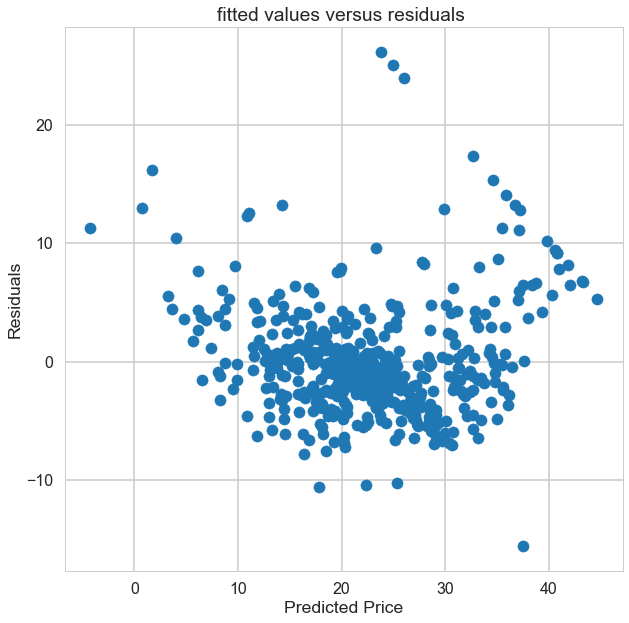

In [49]:
plt.figure(figsize=(10,10))
plt.scatter(model_fitted_y,model_residuals)
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("fitted values versus residuals ")
plt.show()

positive values for the residual (on the y-axis) mean the prediction was too low, and negative values mean the prediction was too high; 0 means the guess was exactly correct. In this scatter plot, the points are symmetrically distributed, tending to cluster towards the middle of the plot
 adn they’re clustered around the lower single digits of the y-axis there is also not a clear patterns. I can conclude the spread is normal but we have several outliers.


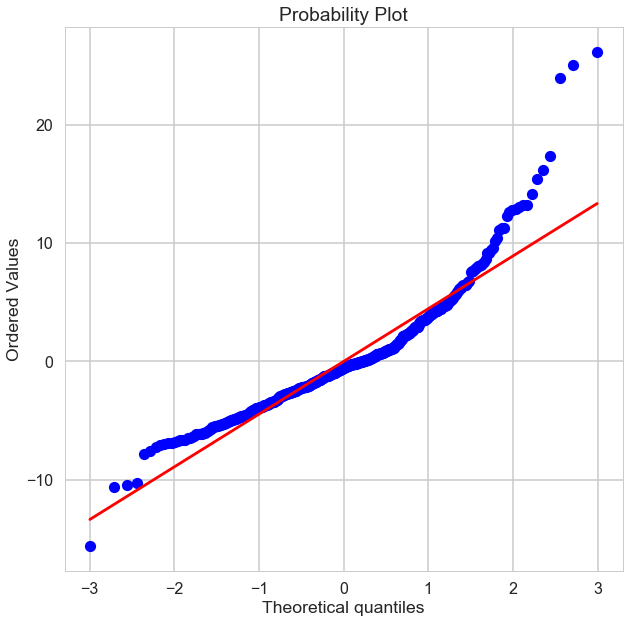

In [50]:
import pylab 
plt.figure(figsize=(10,10))
stats.probplot(model_residuals, dist="norm", plot=pylab)
pylab.show()

Base on the quantile plot, the residuals are normally distributed but ther is several outliers.
If a data point is below Q1 – 1.5(IQR), it is considered to be an outlier. If a data point is above Q3 + 1.5(IQR), it is considered to be an outlier.

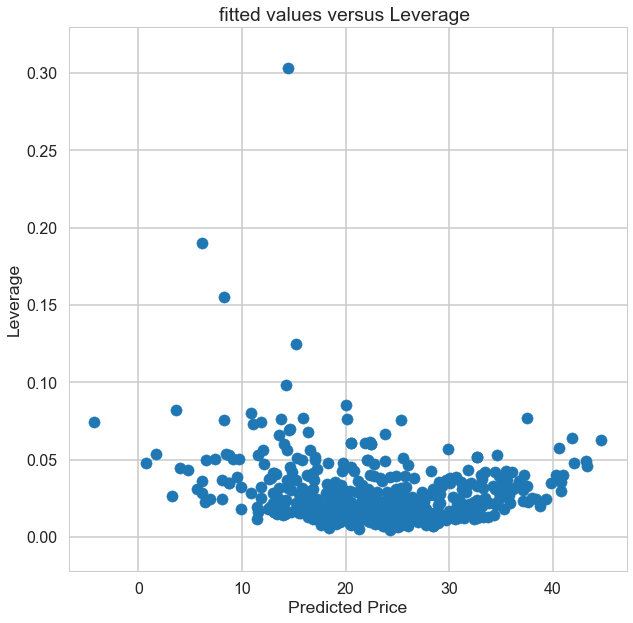

In [51]:
plt.figure(figsize=(10,10))
plt.scatter(model_fitted_y,model_leverage)
plt.xlabel("Predicted Price")
plt.ylabel("Leverage")
plt.title("fitted values versus Leverage ")
plt.show()

An outlier is a data point whose response y does not follow the general trend of the rest of the data. 
A data point has high leverage if it has "extreme" predictor x values. With a single predictor, an extreme x value is simply one that is particularly high or low. With multiple predictors, extreme x values may be particularly high or low for one or more predictors, or may be "unusual" combinations of predictor values (e.g., with two predictors that are positively correlated, an unusual combination of predictor values might be a high value of one predictor paired with a low value of the other predictor).
Note that — for our purposes — we consider a data point to be an outlier only if it is extreme with respect to the other y values, not the x values.
A data point is influential if it unduly influences any part of a regression analysis, such as the predicted responses, the estimated slope coefficients, or the hypothesis test results. Outliers and high leverage data points have the potential to be influential, but we generally have to investigate further to determine whether or not they are actually influential.
One advantage of the case in which we have only one predictor is that we can look at simple scatter plots in order to identify any outliers and influential data points. 

- **Residual**:  The difference between the predicted value (based on the regression equation) and the actual, observed value.
- **Outlier**:  In linear regression, an outlier is an observation with large residual.  In other words, it is an observation whose dependent-variable value is unusual given its value on the predictor variables.  An outlier may indicate a sample peculiarity or may indicate a data entry error or other problem. 
- **Leverage**:  An observation with an extreme value on a predictor variable is a point with high leverage.  Leverage is a measure of how far an independent variable deviates from its mean.  High leverage points can have a great amount of effect on the estimate of regression coefficients. 
- **Influence**:  An observation is said to be influential if removing the observation substantially changes the estimate of the regression coefficients.  Influence can be thought of as the product of leverage and outlierness.  
- **Cook’s distance (or Cook’s D)**: A measure that combines the information of leverage and residual of the observation.


Robust regression can be used in any situation in which you would use least squares regression.  When fitting a least squares regression, we might find some outliers or high leverage data points.  We have decided that these data points are not data entry errors, neither they are from a different population than most of our data. So we have no compelling reason to exclude them from the analysis.  Robust regression might be a good strategy since it is a compromise between excluding these points entirely from the analysis and including all the data points and treating all them equally in OLS regression. The idea of robust regression is to weigh the observations differently based on how well behaved these observations are. Roughly speaking, it is a form of weighted and reweighted least squares regression.  
Stata’s rreg command implements a version of robust regression. It first runs the OLS regression, gets the Cook’s D for each observation, and then drops any observation with Cook’s distance greater than 1.  Then iteration process begins in which weights are calculated based on absolute residuals.  The iterating stops when the maximum change between the weights from one iteration to the next is below tolerance.  Two types of weights are used.  In Huber weighting, observations with small residuals get a weight of 1, the larger the residual, the smaller the weight.  With biweighting, all cases with a non-zero residual get down-weighted at least a little.  The two different kinds of weight are used because Huber weights can have difficulties with severe outliers, and biweights can have difficulties converging or may yield multiple solutions.  Using the Huber weights first helps to minimize problems with the biweights.  You can see the iteration history of both types of weights at the top of the robust regression output.  Using the Stata defaults, robust regression is about 95% as efficient as OLS (Hamilton, 1991).  In short, the most influential points are dropped, and then cases with large absolute residuals are down-weighted.

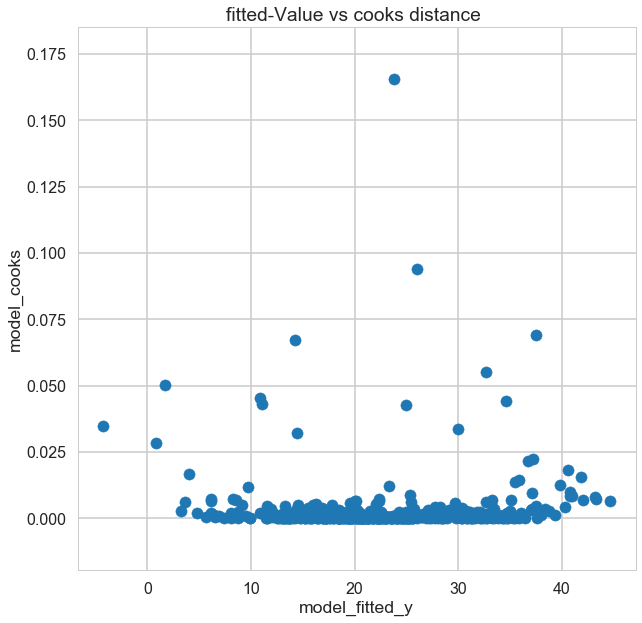

In [52]:
plt.figure(figsize=(10,10))
plt.scatter(model_fitted_y,model_cooks)
plt.xlabel("model_fitted_y")
plt.ylabel("model_cooks")
plt.title("fitted-Value vs cooks distance ")
plt.show()

Cook’s distance (or Cook’s D): A measure that combines the information of leverage and residual of the observation.

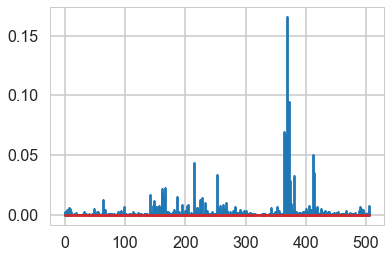

In [53]:
#c is the distance and p is p-value
(c, p) =model_fit.get_influence().cooks_distance
plt.stem(np.arange(len(c)), c, markerfmt=",")
plt.show()

I remove the samples with c larger than 0.005 from the Boston data frame. 

Numer of Outliers: 52


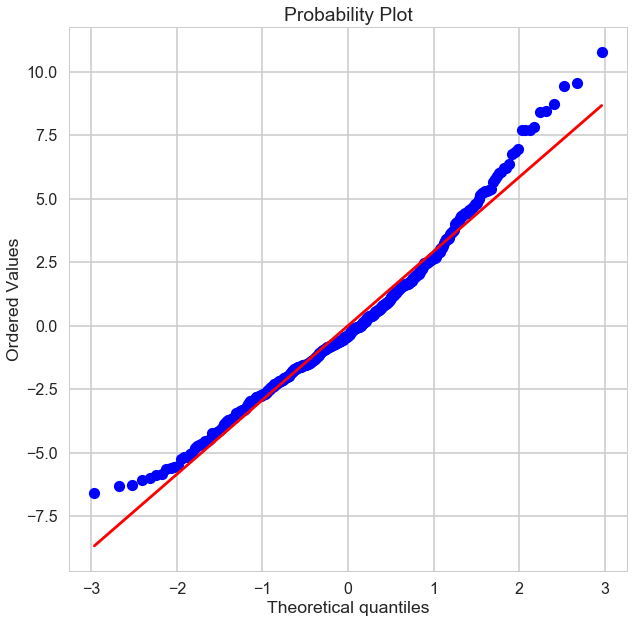

In [54]:
Outlier=[i for i, e in enumerate(c) if e >0.005]
bos1=bos.drop(Outlier)
print('Numer of Outliers:', len(Outlier))

X1 = bos1.drop('PRICE', axis = 1)
model_fit1= ols('PRICE ~X1',bos1).fit()

# fitted values (need a constant term for intercept)
model_fitted_y1 = model_fit1.fittedvalues
# model residuals
model_residuals1 = model_fit1.resid

plt.figure(figsize=(10,10))
stats.probplot(model_residuals1, dist="norm", plot=pylab)
pylab.show()

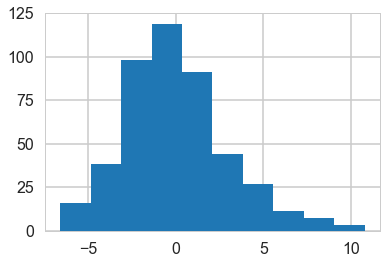

In [55]:
plt.hist(model_residuals1)
plt.show()

There is not Outlier in the new residual histogram.

In [56]:
print('Results for data without outliers:')
print('')
x = sm.add_constant(X1)
est = sm.OLS(bos1.PRICE, x)
print('F_Value:',est.fit().f_pvalue)
lm.fit(X1, bos1.PRICE)
r2=r2_score(bos1.PRICE ,lm.predict(X1))
print('R2 score: ',r2)
print('Akaike Information Criterion (AIC):',est2.fit().aic)


Results for data without outliers:

F_Value: 2.100726737481989e-163
R2 score:  0.8359596503914237
Akaike Information Criterion (AIC): 3222.662121295756


In [57]:
print('Results of the original dataset:')
print('')
x2 = sm.add_constant(X)
est2 = sm.OLS(bos.PRICE, x2)
print('F_Value:',est2.fit().f_pvalue)
lm.fit(X, bos.PRICE)
r2=r2_score(bos.PRICE ,lm.predict(X))
print('R2 score (All FIVE): ',r2)
print('Akaike Information Criterion (AIC):',est2.fit().aic)


Results of the original dataset:

F_Value: 6.946752831854574e-135
R2 score (All FIVE):  0.7406077428649428
Akaike Information Criterion (AIC): 3025.676720007459


As it is clear, by removing the outliers and residuals, the f-value become smaller, the r score increases and the AIC decrease. Which means we are getting a better linear regression model.